<a id='top'></a>

<img src="https://www.rstudio.com/wp-content/uploads/2014/06/RStudio-Ball.png" width="100">

- Code snippets! -> Visual Studio
- [R for Data Science book](http://r4ds.had.co.nz/data-visualisation.html)
- Use pipes %>%

#### Table of contents
- [R commands](#commands)
- [Data samples](#data_samples)
- [Plots](#plot)
- [Pipes](#pipes)
- Microsoft R Server:
    - [RevoScaleR](#RevoScaleR)
    - [SparkR](#sparkr)
- [Shiny](#shiny)

<a id='commands'></a>

# R Commands

In [ ]:
?merge #help

### Directory & files

In [ ]:
# http://www.statmethods.net/interface/workspace.html
list.files()
getwd()
setwd("C:\\Users\\ts93856\\Desktop\\datasource") # Set working directory
infile <- file.path(dirName, fileName) # merge filename and pathname
q() #quit R

#### Workspace

In [ ]:
rm(list = ls()) #removes objects in workspace

save.image() #save workspace
load(".RData") #load (does not append, loads) objects

### Comments

In [ ]:
Ctrl + Shift + C # multiline comments in R Studio

### Print

In [ ]:
print(a)
print("Hello")
print(paste0("Sensitivity: ", a)) # variables and text

### Packages

In [ ]:
#import packages
install.packages("jsonlite") # ,dependencies=TRUE)
library(e1071)

### Import data

In [ ]:
jd <- jsonlite::fromJSON("https://.../json?address=1699+Amphitheatre+Parkway,+Mountain+View,+CA") # online source
bn = read.csv("https:...csv?accessType=DOWNLOAD") # header = TRUE, stringAsFactors = FALSE # local source
jd$results$address_components[[1]]$long_name # ???
# httr package

### Samples

In [ ]:
#df
mtcars
fr <- data.frame(c("hi","ho"), c(1,2), c(TRUE,FALSE))

#matrix
matrix(1:9, byrow=TRUE, nrow  =3)

### Data overview

In [ ]:
str(bn)
head(bn)
summary(bn)
summary(bn$First.Name)
dim(bn)
nrow(bn)
class(bn)
table(bn$col1) #show number of occursions
count(bn$col1) #from package plyr

### Transform data

#### Column names

In [ ]:
colnames(df)
colnames(df) <- c("col1", "col2", "col3")
names(poker_vector) <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday")

#Difference names vs colnames: 
# colnames also works for matrices, names does not
# can use names to set/get the names of vectors

#### Remove columns

In [ ]:
df$firstcol <- NULL ## remove columns we don't need

In [ ]:
#Remove NAs
aq <-na.omit(airquality)

#Remove NAs selectively
airquality[complete.cases(airquality[,c(1,3,4,5,6)]),]

#### Subset of dataframe

In [ ]:
df[,c("col_1","col_2")]
subset(df, diameter < 1) # with condition
subset(df, substr(this_column, start=1, stop=7)=="Manufac")

#### Apply function

In [ ]:
df$col1 <- df$col1 +2

df[, catList] <- lapply(df[, catList], function(x) as.factor(as.character(x))) ## apply function to column

# string transformation
names(eeframe) <- gsub("\\.", "", names(eeframe)) # grep/ gsub - http://www.inside-r.org/r-doc/base/sub
## convert csv in xdf (Xdf files store data in compressed and optimized format)

#### Melt

In [ ]:
# reshape into long format
df2 <- reshape2::melt(df, id=c("ID","Name"))

### connect dfs

In [ ]:
cbind(matrix1,matrix2) # nebeneinander
rbind(matrix1,matrix2) # untereinander

In [ ]:
#merging
mrg <- merge(fr1, fr2, by="ID")

In [ ]:
#vectors can be transformed to factors
# Gender vector
gender_vector <- c("Male", "Female", "Female", "Male", "Male")

# Convert gender_vector to a factor
factor_gender_vector <- factor(gender_vector)

### Sort

In [ ]:
positions <-  order(planets_df$diameter) # order() to create positions
planets_df[positions,] # sort using 'positions'

In [ ]:
#foreach:

install.packages("foreach")
library(foreach)
foreach(i=1:10) %do%
  rnorm(i)

#for the foreach, we can use parallel computing
install.packages("doParallel")
library(doParallel)

#or cluster computing
cl < makeCluster(4) # from the doParallel
registerDoParallel(cl)

df <- data.frame(ID=c(1,3,4), name=c("Steve","mike","Mary"), c(32,24,52),c(80,90,100))

df2 <- reshape(df, varying=c("2013","2014"), v.names="Percent", time...)
install.packages("reshape")
library(reshape)

#transpose
carmpg <- mtcars[order(-mtcars$mpg),]
carmpg <- carmpg[1:10,c(1,2,4,6)]
carmpg <- data.frame(t(carmpg))
carmpg$Fiat.128

#aggregate
ag <- aggregate(mtcars$mpg, list(mtcars$hp), mean)

#hmisc package
r <- aregImpute(~Ozone + Solar.R + Wind ...)

#slice the df
cut(airquality$Temp, breaks=c(0,80,100,150), labels=c("cold","nice","hot"))

# Data analysis

In [ ]:
#modeling functions
lm #linear modeling
glm
aov #analysis of variance

t.test
TukeyHSD #creates sets of confidence intervals
predict

#helper functions for more analysis
coef
residuals
fitted
confint #confidence interval



##Data analysis
#linear modeling
lml <- lm(trees$Volume ~ trees$Height + trees$Girth) #trees$Volume is dependent variable, trees$Height + trees$Girth effects it)
summary(lml)
plot(lml)
lm2 <- lm(mpg ~ cyl + disp + hp + wt, data=mtcars) #instead of mtcars.wt each time

#Variance analysis
boxplot(Speed ~ Expt, data=morley)
a <- aov(Speed ~ Expt, data=morley)
summary(a)

#R Coef Function
lmf <- lm(lv ~lg + trees$Height)
summary(lmf)
x <- coef(lmf)
x

#R Fitted function
lmf <- lm(mpg ~ disp, data=mtcars)
plot(fitted(lmf), residuals(lmf))
abline(h=0) # ususally there is not a line displayed in the plot above

#R residual function
lmf <- lm(mtcars$mpg ~ mtcars$disp)
residuals(lmf)
summary(lmf)
summary(residuals(lmf))
plot(fitted(lmf), residuals(lmf)) #what are the fitted lmfs?
abline(h=0)

#Covariance matrix
lmf <- lm(trees$Volume ~ trees$Girth + trees$Height)
vcov(lmf)

#Confidence interval
plot(faithful$eruptions, faithful$waiting)
lme <- lm(eruptions ~ waiting, data=faithful)
summary(lme)
ci <- confint(lme, level=0.95)

#Generalized linear model
m <- glm(cyl ~ disp + hp, data=mtcars, family=poisson)
params <- data.frame(hp=110, disp=160)
predict(m, params, type="response")

#T Test
r <- rnorm(100, 1000, 100) # (# of items, mean, standard deviation)
tt <- t.test(r, mu=1000)
str(tt)

#TukeyHSD Test
a <- aov(Speed ~ factor(Expt), data=morley)
TukeyHSD(a)
boxplot(Speed ~ Expt, data=morley)
plot(TukeyHSD(a))

#Predict Function
plot(eruptions ~ waiting, data=faithful)
lme <- lm(eruptions ~ waiting, data=faithful)
dfe <- data.frame(waiting=50)
predict(lme, dfe, interval="predict", level=0.95)

#plot
library(ggplot2)
qplot(eruptions, waiting, data=faithful, color=waiting, size=eruptions, geom=c("point","smooth"), method="lm")

### Time series

In [2]:
tsdata <- ts(sample(1:100, 24), start=c(2013,1), end=c(2014,12), frequency=12, deltat=1/12)
str(tsdata)
f <- stl(AirPassengers, s.window="period")
library(forecast)
f <- ets(AirPassengers)
plot(forecast(f,12))
f <- auto.arima(AirPassengers)





# >>>> Machine learning <<<<
# Two-way comparison
prop.table(table(train$Survived, train$Child),1)
# 

ERROR: Error in parse(text = x, srcfile = src): <text>:119:41: unerwartetes Symbol
118: #hmisc package
119: r <- aregImpute(~Ozone + Solar.R + Wind ...
                                             ^


# R functions

### Scale

In [ ]:
scale(dataScale$A, center = TRUE, scale  = FALSE)
z[,scalelist] <- lapply(y[,scalelist], function(x) as.numeric(scale(x)))

### lapply

- R version of for loop
- use lapply to iterate over a path
- apply functions to columns

In [ ]:
lapply(mortgageCsvPaths, FUN = function(csv_file) {
    rxImport(inData = csv_file,
            outFile = mortageXdf,
            append = file.exists(mortgageXdf))
})

#### Remove empty columns

In [ ]:
rm(train)

<a id='data_samples'></a>
[back to top](#top)

# Data samples

In [ ]:
seq(10) #create sequence from 1 to 10

<a id='plot'></a>
[back to top](#top)

# Plots

In [ ]:
library(ggplot2)

In [ ]:
# ggplot cheatsheat
https://www.rstudio.com/wp-content/uploads/2015/12/ggplot2-cheatsheet-2.0.pdf

In [ ]:
#histogram


In [ ]:
# bar
http://docs.ggplot2.org/0.9.3.1/geom_bar.html

In [ ]:
# boxplot
ggplot(data = entropy_merged, aes(x=label, y=Entropy)) + geom_boxplot(outlier.shape=NA) + #avoid plotting outliers twice
    geom_jitter(position=position_jitter(width=0.1, height=0))

In [ ]:
# violin plot
g <- ggplot(entropy_merged, aes(x=label, y=Entropy))
g + geom_violin(alpha=0.5, color="gray")+geom_jitter(alpha=0.5,aes(color=label),position =position_jitter(width=0.1))
#source: http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/

In [ ]:
#facet_grid
gplot(df, aes(variable, value, group=1))  + geom_point() + geom_line(colour="black")
 + facet_grid( ~ rounds) + theme(axis.text.x = element_text(angle = 90, vjust = 0, hjust = 1)) +
xlab("Algorithmic Iterations") + ylab("Angular Difference to previously recorded checkpoint") + ggtitle(paste0("The Max of scalar products during training per bootstrap-round - Layer ",j))

In [ ]:
# multiple plots in one box
g1 <- ggplot(subset(output.melt, substr(variable, start=1, stop=3)=="AUC"), aes(x=Round, y=value, color=variable)) + geom_point(size = 4, alpha=0.5) + coord_cartesian(ylim=c(0,1)) + theme(text = element_text(size=20),legend.title = element_blank()) + ylab("AUC") +scale_colour_manual(labels = c("valid", "eval"), values = c("blue", "red"))
g2 <- ggplot(subset(output.melt, substr(variable, start=1, stop=3)=="Acc"), aes(x=Round, y=value/100, color=variable)) + geom_point(size = 4, alpha=0.5) + coord_cartesian(ylim=c(0,1)) + theme(text = element_text(size=20),legend.title = element_blank()) + ylab("Accuracy")+scale_colour_manual(labels = c("valid", "eval"), values = c("blue", "red"))
g3 <- ggplot(subset(output.melt, substr(variable, start=1, stop=3)=="Sen"), aes(x=Round, y=value, color=variable)) + geom_point(size = 4, alpha=0.5) + coord_cartesian(ylim=c(0,1)) + theme(text = element_text(size=20),legend.title = element_blank()) + ylab("Sensitivity")+scale_colour_manual(labels = c("valid", "eval"), values = c("blue", "red"))
g4 <- ggplot(subset(output.melt, substr(variable, start=1, stop=3)=="Spe"), aes(x=Round, y=value, color=variable)) + geom_point(size = 4, alpha=0.5) + coord_cartesian(ylim=c(0,1)) + theme(text = element_text(size=20),legend.title = element_blank()) + ylab("Specificity")+scale_colour_manual(labels = c("valid", "eval"), values = c("blue", "red"))

grid.arrange(g1,g2,g3,g4, nrow=2, ncol=2)

In [ ]:
# Plotting guide http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/

In [ ]:
# SVDS style guide
# https://github.com/jbwhit/svds-style/blob/master/notebooks/How-to-plot-good-and-use-SVDS-style-good-too.ipynb

<a id='pipes'></a>
[back to top](#top)

# Pipes (for data selection)

In [ ]:
library(magrittr) # https://www.r-statistics.com/2014/08/simpler-r-coding-with-pipes-the-present-and-future-of-the-magrittr-package/
library(dplyr)

In [9]:
#%>% "then"

flights %>%   
group_by(dest) %>%   
arrange(desc(arr_delay))

- you cannot use $assign(), get(), load()$ with the pipe, unless you specify the environment "x" %>% assign(100, envir = env)

When not to use the pipe:
- You have multiple inputs or outputs. If there isn’t one primary object being transformed, but two or more objects being combined together, don’t use the pipe.
- Your pipes get longer than five or six lines

#### Examples

In [ ]:
# sort


In [ ]:
# filter + summarise
mtcars %>%
dplyr::filter(., cyl == 6) %>%
dplyr::summarise(sum(mpg))

In [ ]:
# count group occurences
count_type_1 <- train %>% filter(label %>% equals(1))

In [ ]:
# filter + group + summarize + plot
library(babynames) # data package
babynames %>%
    filter(name %>% substr(1, 3) %>% equals("Ste")) %>%
    group_by(year, sex) %>%
    summarize(total = sum(n)) %>%
    qplot(year, total, color = sex, data = ., geom = "line") %>%
    add(ggtitle('Names starting with "Ste"')) %>%
    print

In [ ]:
# filter + head
df %>%
+ dplyr::filter(., col1 ==2) %>%
+ head()

In [ ]:
# else...
frame1 <- mutate(frame1, Col4 = Col2 + Col3) #Create new column with new calculated 
frame1 <- group_by(frame1, Col1)
frame1 <- distinct(frame1, Col2) #search for duplicates
frame1 <- sample_frac(frame1, 0.5) #create a sample (for a fraction of the data)
frame1 <- sample_n(frame1, 200)
frame1 <- summarize(frame1, m1 = mean(Col1))
## frame the dataframe (pipe)
frame1 <- frame1 %>%
            filter(Col1 == 2013) %>%
            mutate(Col4 = Col2 + Col3)
inner_join(a, b, by = colName)

# Packages

In [ ]:
- dplyr
- [Machine Learning packages](http://www.r-bloggers.com/what-are-the-best-machine-learning-packages-in-r/)
- tidyr

<a id='RevoScaleR'></a>
[back to top](#top)

# R Server - RevoScaleR

In [ ]:
####
# Vocabulary
####

# xdf - external data frame
# PEMA - parallel external memory algorithms

In [ ]:
####
# Help
####
rxOptions()
sampleDataDir <- rxOptions()[["sampleDataDir"]]
args(rxSummary)

In [ ]:
####
# Compute context
####

In [ ]:
####
# Read in data - save in xdf binary format (recommended)
####

dataDir <- "../data"
AirlineCsv <- file.path(dataDir, "2007.csv")
AirlineXdf <- file.path(dataDir, "2007.xdf")
rxImport(inData = AirlineCsv, outFile = AirlineXdf, overwrite = TRUE)

In [ ]:
####
# Inspect data
####

rxOptions(reportProgress = 0)
rxGetInfo(data = AirlineXdf, getVarInfo = TRUE, varsToKeep = c("ArrDelay","DepDelay","Distance"))
rxGetVarInfo(data = AirlineXdf)
str(GetVarInfoObject[1])

In [ ]:
# Summarize Variables
rxSummary(~DepDelay + Distance, data = AirlineXdf)
rxQuantile(varName = "Open", data = DJIAdata)
# Count of variables
print(rxCrossTabs(~DayOfWeek, data = DJIAdata), headers=TRUE)
# Histogram
rxHistogram(~DepDelay, data = AirlineXdf, xAxisMinMax = c(-50, 250))
rxHistogram(~airSpeed, data = newAirlineXdf, rowSelection=(airSpeed>50) & (airSpeed<750),scales=list(x=list(at=seq(100,700,by=1000))),xlab=list(label="Air Speed"),ylab=list(label="Frequency"),numBreaks=5000,xNumTicks=40)

In [5]:
AirlineXdf <- file.path(dataDir, "2007_AirSpeed.xdf")
rxDataStep(inData = AirlineXdf, outFile = newAirlineXdf, varsToKeep = c("AirTime","Distance","DepDelay","ArrDelay"),transforms = list(airSpeed = Distance / AirTime),overwrite=TRUE)

In [ ]:
# Correlations
rxCor(formula = ~DepDelay + ArrDelay + airSpeed, data = newAirlineXdf)

In [ ]:
# linear model
reg1 <- rxLinMod(formula = airSpeed ~ DepDelay, data = newAirlineXdf)

<a id='sparkr'></a>
[back to top](#top)

# R Server - SparkR

In [ ]:
# https://spark.apache.org/docs/1.6.0/sparkr.html - Documentation

In [ ]:
rxHadoopListFiles("/") # List files

In [ ]:
# Spark context
library(SparkR) 
Sys.setenv('SPARKR_SUBMIT_ARGS'='"--packages" "com.databricks:spark-csv_2.10:1.4.0" "sparkr-shell"') # context for csv import read csv -> https://github.com/databricks/spark-csv
sc <- sparkR.init()
sqlContext <- sparkRSQL.init(sc)

#### Read files 

https://www.r-bloggers.com/read-from-hdfs-with-r-brief-overview-of-sparkr/ # Read files from hdfs 

#### Read csv

In [ ]:
# usually you would precise the schema of the csv, if not: inferSchema = "true"
 customSchema <- structType(
   structField("Semana", "integer"),
   structField("Agencia_ID", "integer"),
   structField("Canal_ID", "integer"))
train <- read.df(sqlContext, "/train.csv", header= "true", source = "com.databricks.spark.csv", inferSchema = "true")
# alternative: SparkDf <- createDataFrame(sqlContext,faithful), but must be parquet, json or sql
cache(train)
system.time(head(train))

#### Create dataframe

In [ ]:
# doku: https://spark.apache.org/docs/1.5.1/sparkr.html
mtrdd <- createDataFrame(sqlContext, mtcars) # Create RDD from dataframe

#### Add/change column

In [ ]:
train = train %>% withColumn("id", lit(0))

#### Rename column

In [ ]:
train <- withColumnRenamed(train, "col", "new_col")

### Characteristics

Doesn't run in memory, but on-disk storage
- Multi-threading
- Parallel processing
- On-disk data storage (Hard drive storage and not RAM builds computational limit)
- Can work on a cluster

In [2]:
# Use different context accessing distributed or parallel computing
rxSetComputeContext( LocalParallel() )
rxSetComputeContext( RxHadoopMR(...))

ERROR: Error in eval(expr, envir, enclos): konnte Funktion "rxSetComputeContext" nicht finden


#### how it works

Parallel External Memory Algorithms
1. A chunk/subset of data is extracted from the main dataset
2. An intermediate result is calculated from that chunk of data
3. The intermediate results are combined into a final dataset

Available Algorithms are not the same as open-source R algorithms:
- linear regression (rxLinMod)
- K-means (rxKmeans)
- ...

- native data format: XDF File (chunk-oriented (fast to append), column-oriented, pre-computed metadata)

#### examples

In [ ]:
# Sample data directory
rxGetOption("SampleDataDir")
# sample data files
list.files(
rxGetOption("sampleDataDir")
)

In [ ]:
xdfPath <- tempfile(fileext = ".xdf")
xdfPath
file.exists(xdfPath)

# Read the CSV into the new XDF filehttps://compass.esa.cognizant.com/psp/ESA89PRD/EMPLOYEE/ERP/?cmd=login&languageCd=GER
rxImport(inData = csvPath, outFile = xdfPath)

#check results
rxGetInfo(xdfPath, getVarInfo = TRUE)

# Visualization

In [ ]:
library(ggplot2)
qplot(eruptions, waiting, data=faithful, color=waiting, size=eruptions, geom=c("point","smooth"), method="lm")

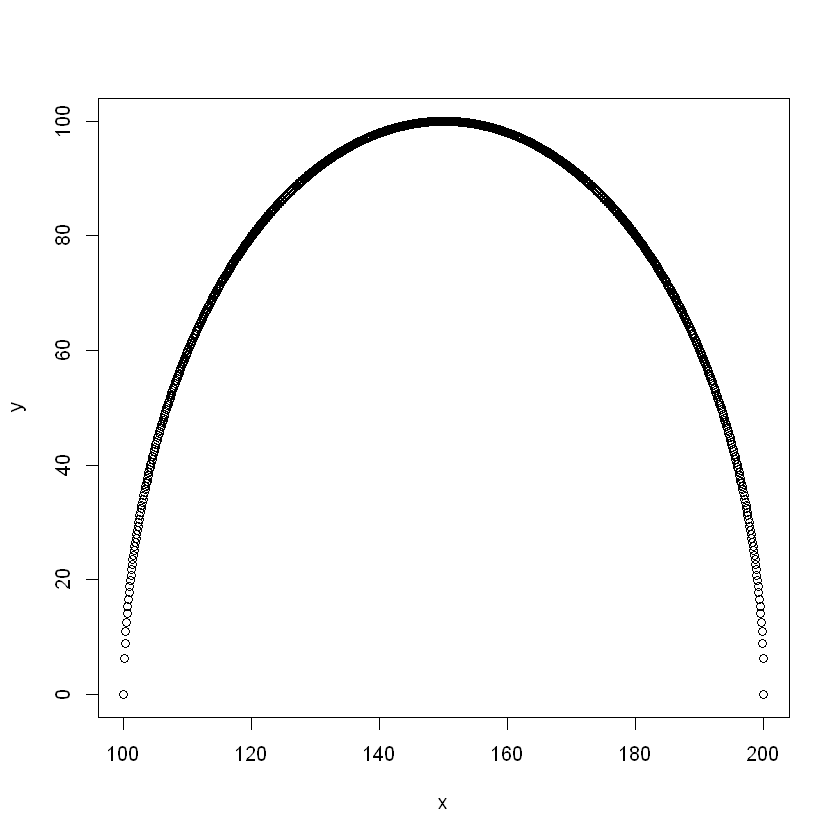

In [29]:
startx <- -50
endx <- 50

x = seq(from=startx, to=endx, by=0.1)

y <- sqrt(50^2-x^2)

y <- y * 2

x <- x + 150

plot(x,y)

<a id='shiny'></a>
[back to top](#top)

# Shiny

www.shiny.rstudio.com

www.rstudio.com/products/shiny/shiny-server/

Minimal viable version:

In [ ]:
library(shiny)
ui <- fluidPage("Hello World")

server <- function(input, output){}

shinyApp(ui = ui, server = server)

Add Input() and Output() functions in fluidPage

Sample input:

In [3]:
sliderInput(inputId = "num", label = "This is the label", ..) #see requirements by ?sliderInput

ERROR: Error in eval(expr, envir, enclos): konnte Funktion "sliderInput" nicht finden


Sample output:

In [4]:
plotOutput("hist")

ERROR: Error in eval(expr, envir, enclos): konnte Funktion "plotOutput" nicht finden


If you build an output object, you need to save output in server command

In [ ]:
server <- function(input, output){
    output$hist <- renderPlot({
        title <- "bla"
        hist(rnorm(100), main = title)
    })curr
}

Save app as app.R, or ui.R and server.R

use isolate() to prevent other parts of the app update when updating one value